In [1]:
import os

In [2]:
Base_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Practice/data_directories"
train_dir = os.path.join(Base_dir , "train")
test_dir = os.path.join(Base_dir , "test")
val_dir = os.path.join(Base_dir , "val")

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def image_generator(directory):
     
    global data_gen 
    data_gen = ImageDataGenerator(rescale = 1./255 , rotation_range=40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
    data_generator = data_gen.flow_from_directory( directory , target_size = (150,150) , batch_size = 20 , class_mode = "binary")
    return data_generator

In [4]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet' , include_top = False , input_shape = (150,150,3))

In [5]:
train_generator =  image_generator(train_dir)
test_generator  =  image_generator(test_dir)
val_generator =  image_generator(val_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

train_dog_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Practice/data_directories/train/dogs"

fnames = [os.path.join(train_dog_dir , i) for i in os.listdir(train_dog_dir)]

for fname in fnames:
    img_path = fname
    img = image.load_img(img_path , target_size = (150,150))
    x = image.img_to_array(img)
    x = np.reshape(x , ((1,) + x.shape))
    break

i = 0
for batch in data_gen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplt = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

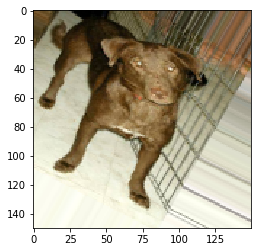

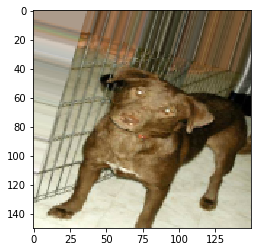

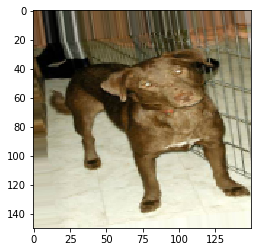

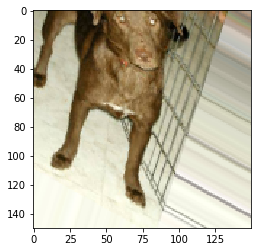

In [7]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

train_dog_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Practice/data_directories/train/dogs"

fnames = [os.path.join(train_dog_dir , i) for i in os.listdir(train_dog_dir)]

for fname in fnames[1:]:
    img_path = fname
    img = image.load_img(img_path , target_size = (150,150))
    x = image.img_to_array(img)
    x = np.reshape(x , ((1,) + x.shape))
    break

i = 0
for batch in data_gen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplt = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    
plt.show()

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from tensorflow.keras import optimizers 
model.compile(loss='binary_crossentropy' , optimizer=optimizers.RMSprop(lr=2e-5) , metrics=['acc'])

In [ ]:
history = model.fit(train_generator,epochs = 5 , steps_per_epoch = 100 , validation_data = val_generator , validation_steps = 50)

Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 [==============================] - 4881s 49s/step - loss: 0.4489 - acc: 0.7755 - val_loss: 0.2322 - val_acc: 0.9130
Epoch 2/5
 71/100 [====================>.........] - ETA: 13:28 - loss: 0.2855 - acc: 0.8824

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

from matplotlib import pyplot as plt

plt.plot(acc , epochs , "bo" , label = "Training_Accuracy")
plt.plot(val_acc , epochs , "b" , label = "Validation_Accuracy")
plt.legend()
plt.figure()
plt.plot(loss , epochs , "bo" , label = "Training_Loss")
plt.plot(val_loss , epochs , "b" , label = "Validation_Loss")
plt.legend()
plt.figure()